In [1]:
import re
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [12, 8]

In [3]:
def read_log(logfile):
    "Returns (<trials per minute>, [<initial score>], [<final score>])"
    # T=36622.222656 improved random: initial -106991.74072810961 final: 3.2808 to spare
    log_re = re.compile(r'T=([\d\.]+) .* initial:? (\S+) final: (\S+) ')
    first_time = None
    last_time = None
    initial_scores = []
    final_scores = []
    with open(logfile) as fin:
        for line in fin:
            m = log_re.search(line)
            if m:
                (t, it, ft) = map(float, m.groups())
                if first_time is None:
                    first_time = t
                last_time = t
                initial_scores.append(it)
                final_scores.append(ft)
    tpm = (len(final_scores) - 1) / (last_time - first_time) * 60.0
    return (tpm, initial_scores, final_scores)

In [8]:
(tpm1, initial_scores1, final_scores1) = read_log("ot.rand-b0-d1.log")

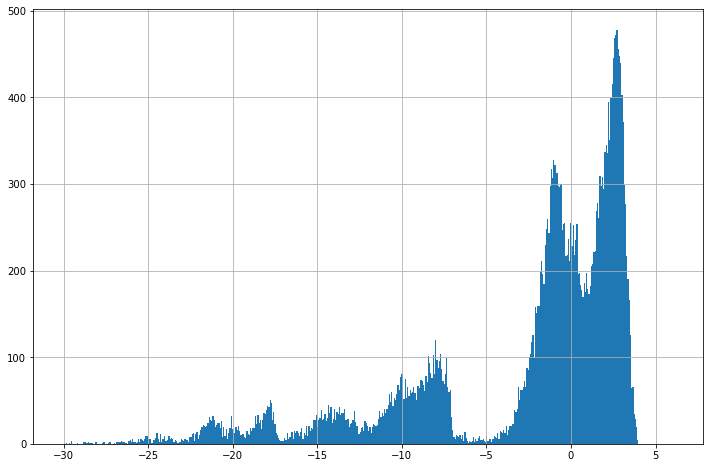

In [9]:
_ = plt.hist(final_scores1, bins=500, range=(-30, 6))
plt.grid(True)

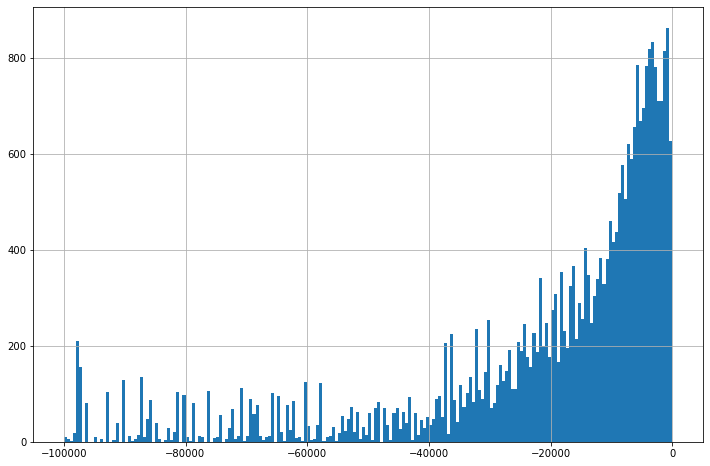

In [10]:
_ = plt.hist(initial_scores1, bins=200, range=(-100000, 0))
plt.grid(True)

In [11]:
thresh = 3.3
passes = len(list(filter(lambda x: x > thresh, final_scores1)))
print("passes per minute =", tpm1 / len(final_scores1) * passes)

passes per minute = 1.9757158392589964


In [12]:
(tpm2, initial_scores2, final_scores2) = read_log("ot.rand-b0-d2.log")

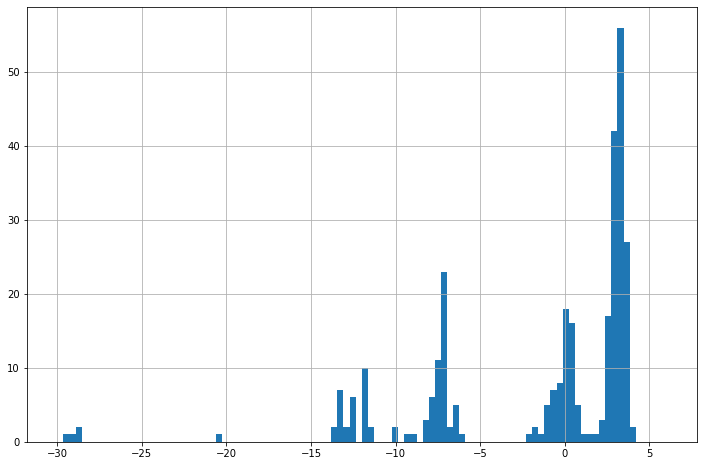

In [13]:
_ = plt.hist(final_scores2, bins=100, range=(-30, 6))
plt.grid(True)

In [14]:
passes = len(list(filter(lambda x: x > thresh, final_scores2)))
print("passes per minute =", tpm2 / len(final_scores2) * passes)

passes per minute = 0.07830179449577457


In [15]:
(tpm3, initial_scores3, final_scores3) = read_log("ot.rand-b0-d1-fixprereq.txt")

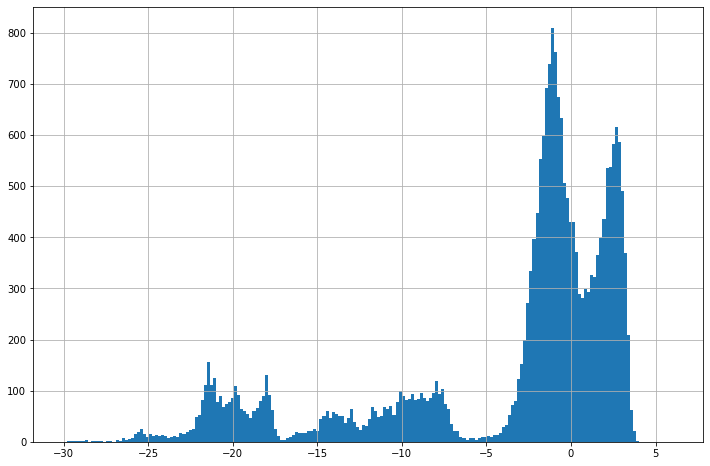

In [16]:
_ = plt.hist(final_scores3, bins=200, range=(-30, 6))
plt.grid(True)

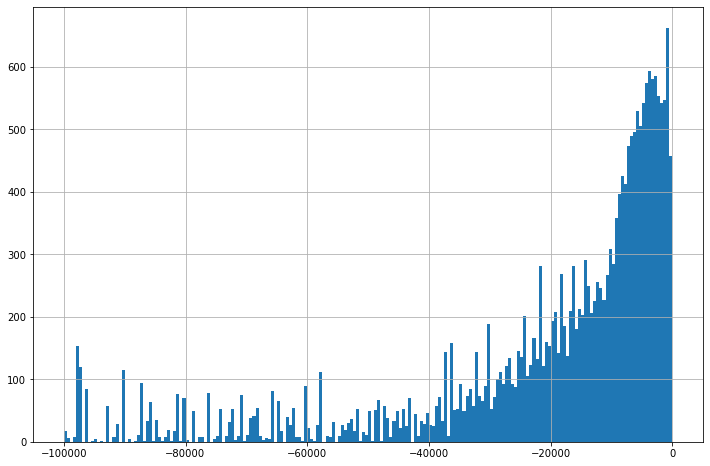

In [17]:
_ = plt.hist(initial_scores3, bins=200, range=(-100000, 0))
plt.grid(True)

In [18]:
passes = len(list(filter(lambda x: x > thresh, final_scores3)))
print("passes per minute =", tpm3 / len(final_scores3) * passes)

passes per minute = 2.0037473328144046


In [19]:
(tpm4, initial_scores4, final_scores4) = read_log("../p/ot.rand-b0-d1-ww.log")

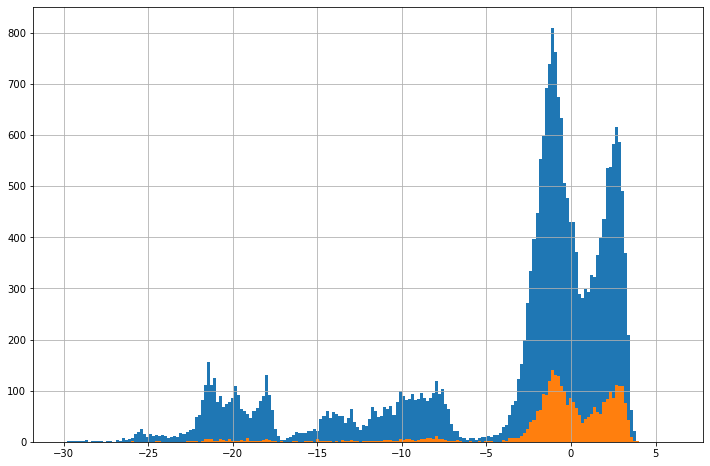

In [20]:
plt.hist(final_scores3, bins=200, range=(-30, 6))
plt.hist(final_scores4, bins=200, range=(-30, 6))
plt.grid(True)

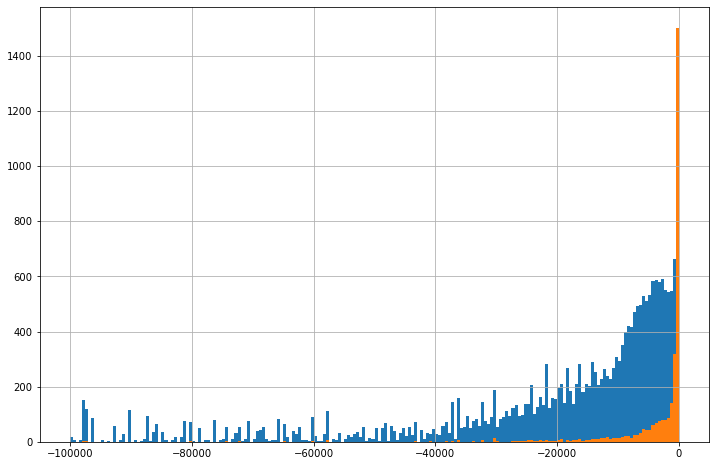

In [21]:
plt.hist(initial_scores3, bins=200, range=(-100000, 5))
plt.hist(initial_scores4, bins=200, range=(-100000, 5))
plt.grid(True)

In [22]:
passes = len(list(filter(lambda x: x > thresh, final_scores4)))
print("passes per minute =", tpm4 / len(final_scores4) * passes)

passes per minute = 240.03012377633922


(-25, 5)

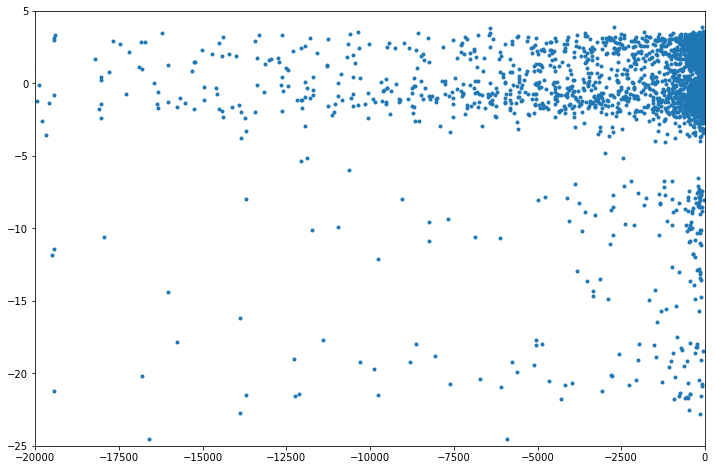

In [27]:
plt.plot(initial_scores4, final_scores4, '.')
plt.xlim(-20000, 0)
plt.ylim(-25, 5)